                                         Predict Used Car prices-LinearRegression

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',names=['symboling', 'normalized-losses','make','fuel-type','aspiration','num-of-doors'
                                             ,'body-style','drive-wheels','engine-location','wheel-base','length',
                                             'width','height','curb-weight','engine-type','num-of-cylinders','engine-size',
                                             'fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm',
                                             'city-mpg','highway-mpg','price'],header=None)

    Reading and Understanding the Data

In [3]:
df=dataset.copy()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
# Kiểm tra số dòng và số cột
df.shape

(205, 26)

       Data Cleaning and Preparation

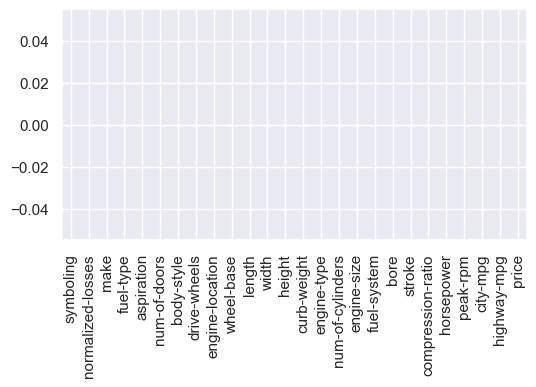

In [7]:
# kiểm tra giá trị bị thiếu và hiển thị chúng qua hình ảnh
missing_data = df.isnull().sum()
missing_data.plot.bar(figsize=(6, 3))
plt.show()

In [8]:
cols = df.columns
for i in cols:
    print(f"{i}")
    print(f"{df[i].unique()}")
    print("\n")

symboling
[ 3  1  2  0 -1 -2]


normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']


make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


fuel-type
['gas' 'diesel']


aspiration
['std' 'turbo']


num-of-doors
['two' 'four' '?']


body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drive-wheels
['rwd' 'fwd' '4wd']


engine-location
['front' 'rear']


wheel-base
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.

In [9]:
# Kiểm tra lỗi chính tả và chỉnh sửa cho đúng
df.replace("peugot","peugeot", inplace=True)
# Thay thế các biểu tượng "?" thành nan
df.replace("?", np.nan, inplace=True)

In [10]:
# Điền các giá trị thiếu với tổng giá trị trung bình của biến đó
col_have_null = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
for i in col_have_null:
    df[i].replace(np.nan, df[i].astype('float').mean(), inplace=True)

In [11]:
# Điền các giá trị thiếu với các giá trị có tần suất xuất hiện nhiều trong biến đó
most_frequent = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].fillna(most_frequent, inplace=True)

In [12]:
# Kiểm tra các dòng dữ liệu có tính lặp lại 
duplicate_rows_df=df[df.duplicated()]
print("Number of duplicate row",duplicate_rows_df.shape)
# Hiển thị các dữ liệu có tính lặp lại
df.loc[df.duplicated()]

Number of duplicate row (0, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [13]:
# Chuyển đổi dữ liệu về dạng dữ liệu mong muốn
df["bore"] = df["bore"].astype(float)
df["normalized-losses"]=df["normalized-losses"].astype(int)
df["stroke"] = df["stroke"].astype(float)
df["price"]=df["price"].astype(float)
df["horsepower"]=df["horsepower"].astype(int)
df["peak-rpm"]=df["peak-rpm"].astype(int)

In [14]:
df.corr()

C:\Users\Admins\AppData\Local\Temp\ipykernel_3016\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071380,0.273678,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351985,-0.360700,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554408,-0.287034,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642176,-0.219861,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110114,-0.320599,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750973,-0.266282,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810705,-0.244600,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575707,-0.254765,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088133,-0.066860,-0.042179,-0.043961,0.082095


- drop variable that weak correlation, below 0.5 ---> These are: symboling, normalized-losses, height, stroke,compression-ratio,peak-rpm

In [15]:
# Loại bỏ các cột
del_cols=['symboling','normalized-losses','height','stroke','compression-ratio','peak-rpm']
for i in del_cols:
    df.drop(i,axis=1,inplace=True)

C:\Users\Admins\AppData\Local\Temp\ipykernel_3016\1507673295.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[v],kde=False,color='purple')


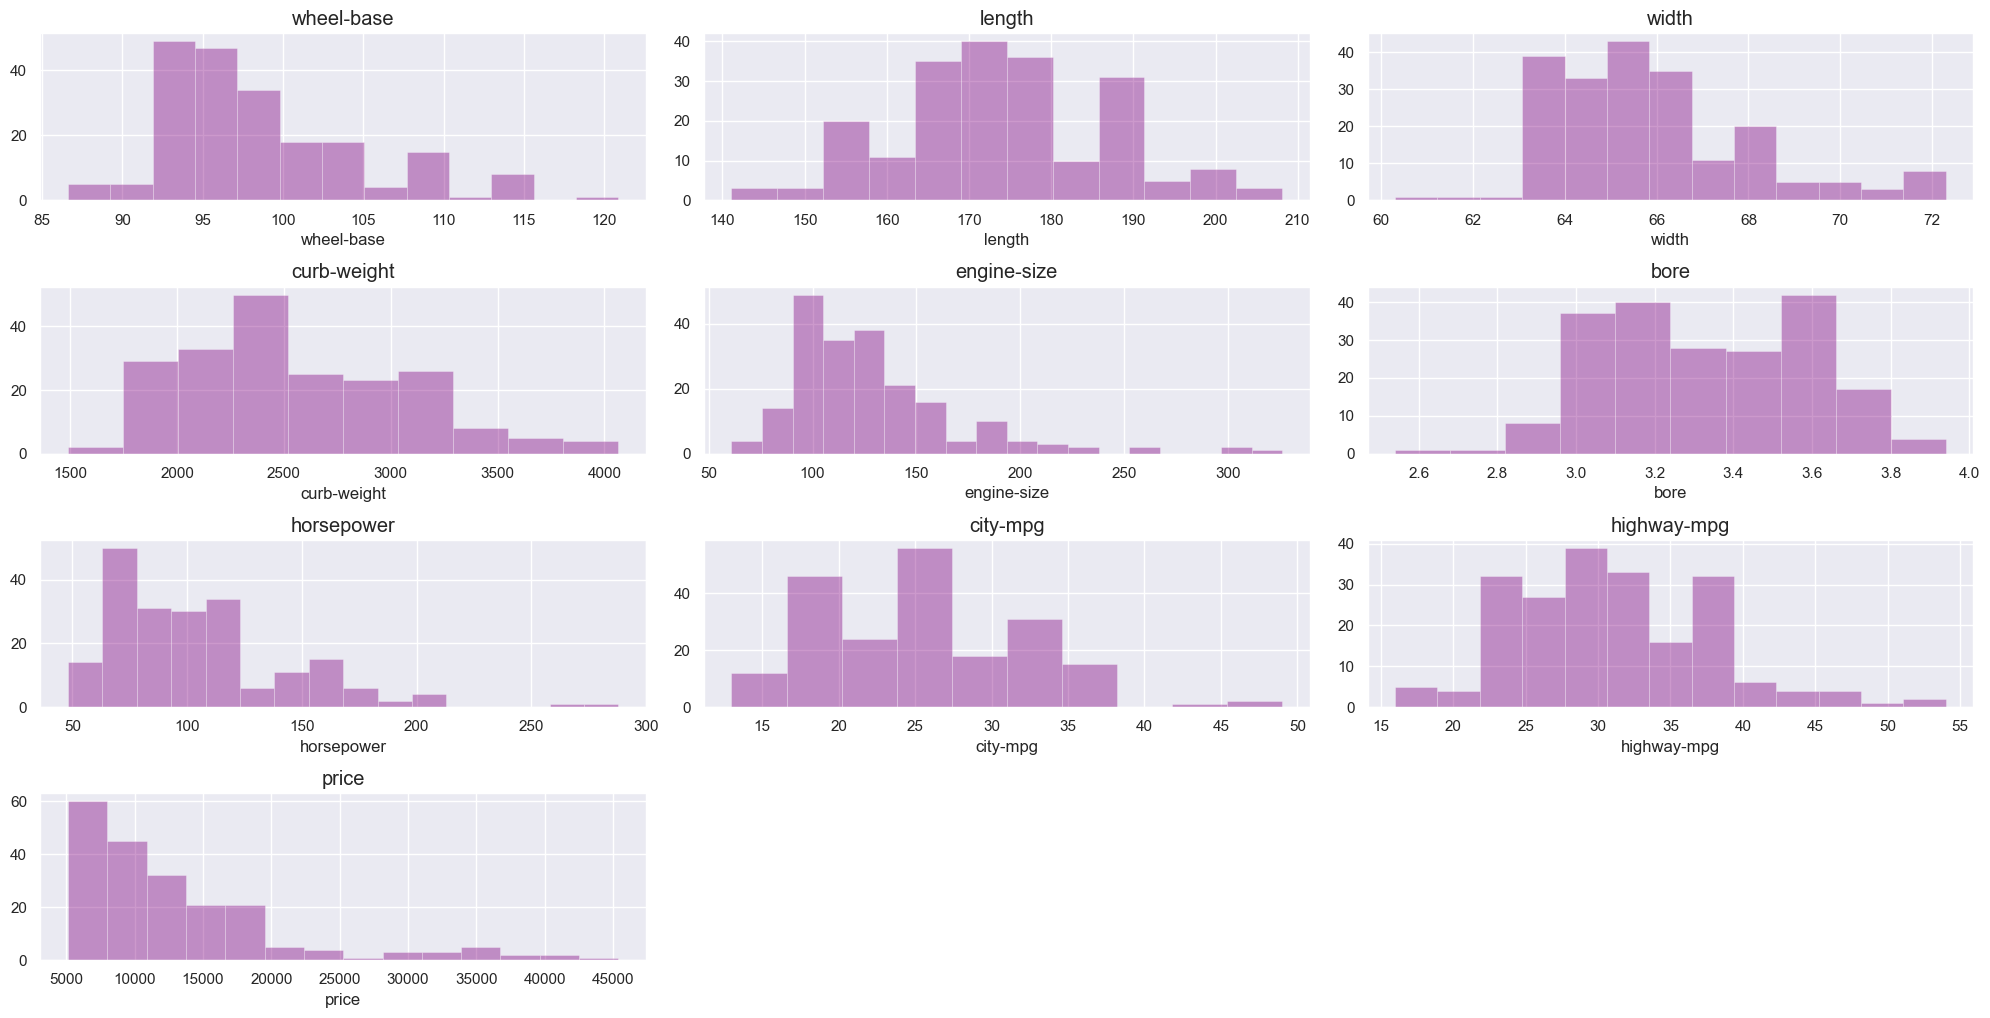

In [16]:
plt.style.use('ggplot')
#chọn tất cả các cột định lượng để kiểm tra tính phân phối của dữ liệu
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))
for i, v in enumerate(numeric_columns):
     sns.set_style("darkgrid")
     plt.subplot(10,3,i+1)   
     sns.distplot(df[v],kde=False,color='purple')
     plt.tight_layout()
     plt.title(v)

- Hình dạng phân phối của biến price lệch trái --> Biến price có thể có nhiều nhiều điểm ngoại lệ lệch nhiều về bên phải. Từ hình dạng phân phối ta có thể thấy giá xe giao động dưới 20.000
- Biến engine-size & wheel- base  có hình dạng phân phối lệch trái

<AxesSubplot: title={'center': 'Car Price Spread'}, ylabel='price'>

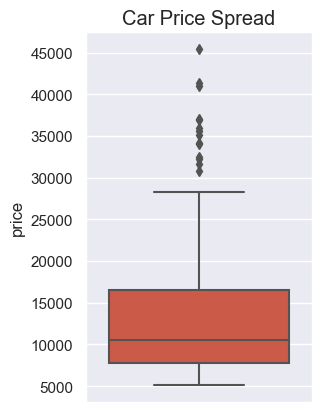

In [17]:
plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

<AxesSubplot: title={'center': 'Category car price Spread'}, xlabel='price', ylabel='make'>

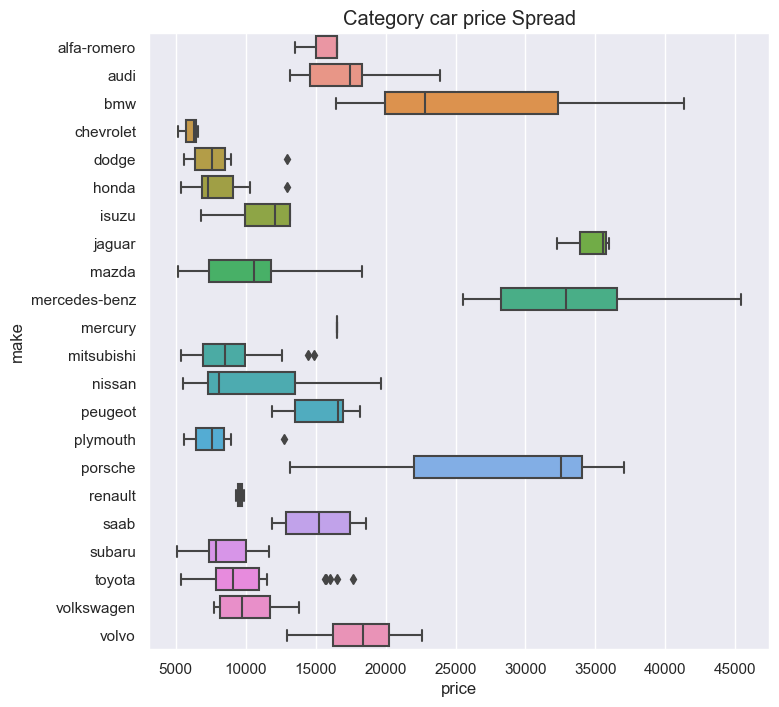

In [18]:
plt.figure(figsize=(8,8))
plt.title('Category car price Spread')
sns.boxplot(data=df, x=df.price, y=df.make)

In [19]:
# Hiển thị các giá trị outlier có make='dodge'
df[(df['make']=="dodge") & (df["price"]>10000)]

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
29,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,2811,ohc,four,156,mfi,3.6,145,19,24,12964.0


In [20]:
# Loại bỏ các gái trị outlier có make='dodge'
df.drop(index=29,inplace=True)

In [21]:
# Hiển thị các gái trị outlier có make='honda'
df[(df["make"]=="honda") & (df["price"]>12500)] 

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
41,honda,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,2465,ohc,four,110,mpfi,3.15,101,24,28,12945.0


In [22]:
# Loại bỏ các giá trị outliercó make='honda'
df.drop(index=41,inplace=True)

In [23]:
# Hiển thị các gái trị outlier có make='mitsubishi'
df[(df['make']=='mitsubishi') & (df['price']>13000)]

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
83,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,2921,ohc,four,156,spdi,3.59,145,19,24,14869.0
84,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,2926,ohc,four,156,spdi,3.59,145,19,24,14489.0


In [24]:
# Loại bỏ các giá trị outlier có make='mitsubishi'
df.drop(index=83, inplace=True)
df.drop(index=84, inplace= True)

In [25]:
# Hiển thị các giá trị outlier có make='plymouth'
df[(df['make']=='plymouth') & (df['price']>10000)]

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
124,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,173.2,66.3,2818,ohc,four,156,spdi,3.59,145,19,24,12764.0


In [26]:
#Loại bỏ các giá trị outlier có make='plymouth'
df.drop(index=124,inplace=True)

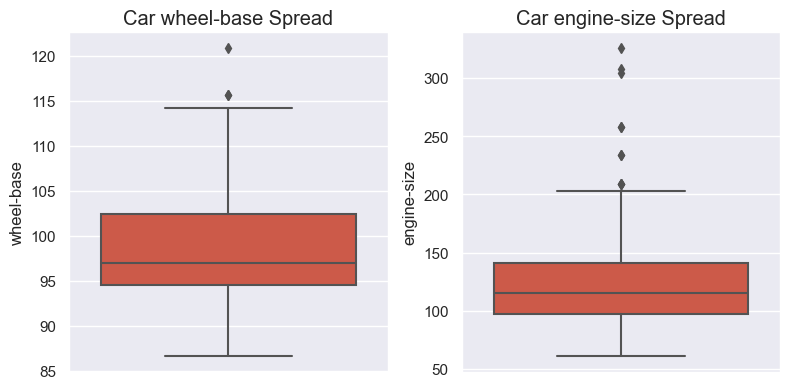

In [27]:
Skewed_right = ['wheel-base', 'engine-size']
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
for ax, i in zip(axs, Skewed_right):
    ax.set_title('Car '+""+ i +""+' Spread')
    sns.boxplot(y=df[i], ax=ax)
plt.tight_layout()
plt.show()

In [28]:
# Xử lý giá trị outlier  bằng phương pháp IQR
def outlier(ds,var):
    Q1 = ds[var].quantile(0.25)
    Q3 = ds[var].quantile(0.75)
    IQR= Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    list=[]
    for i,row in ds.iterrows():
        if (row[var] < lower_bound or row[var] > upper_bound):
            list.append(i)
    return list

In [29]:
for i in outlier(df,"engine-size"):
    df.drop(i,inplace=True)

In [30]:
for i in outlier(df,"wheel-base"):
    df.drop(i,inplace=True)

In [31]:
df.select_dtypes(object)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


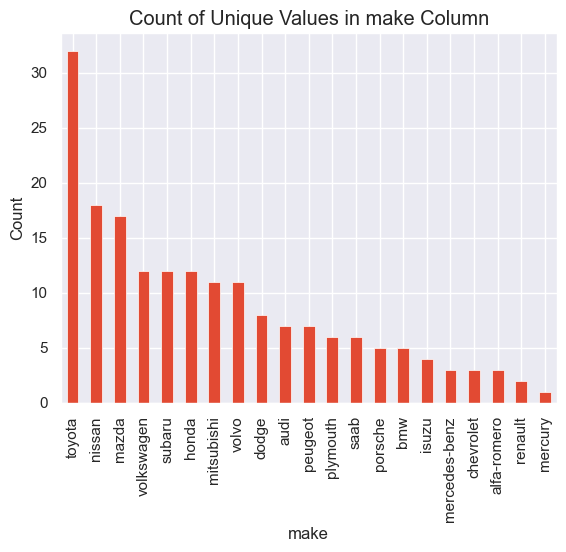

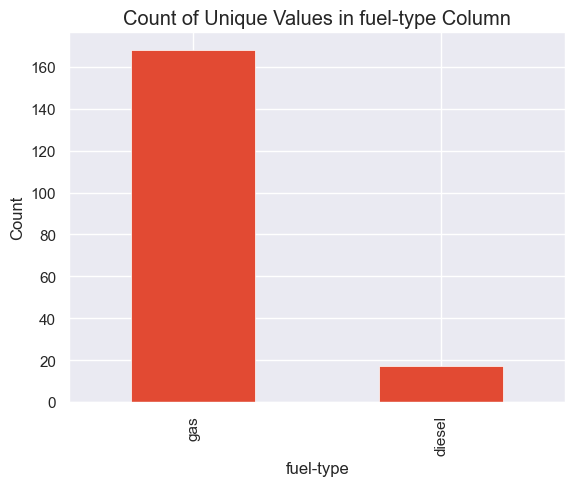

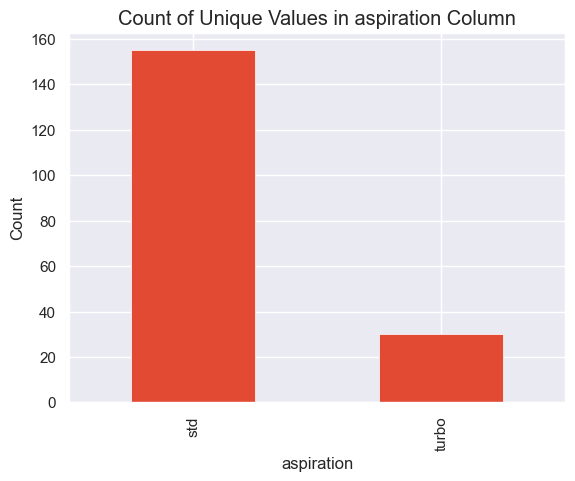

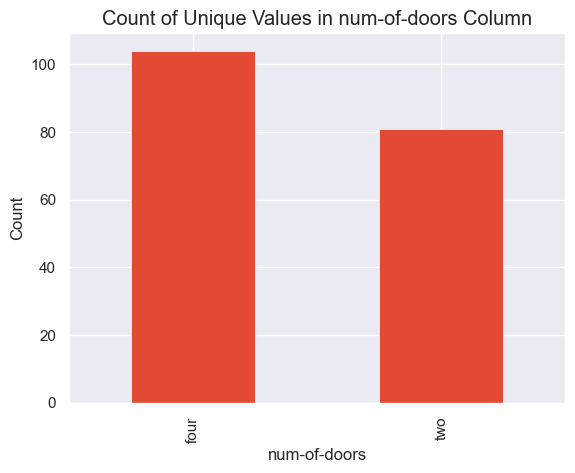

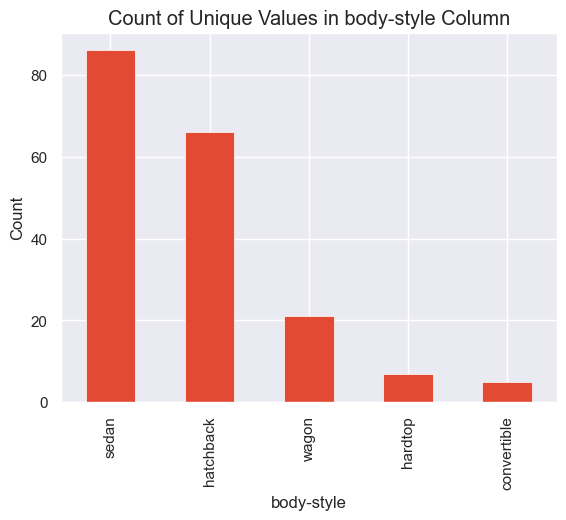

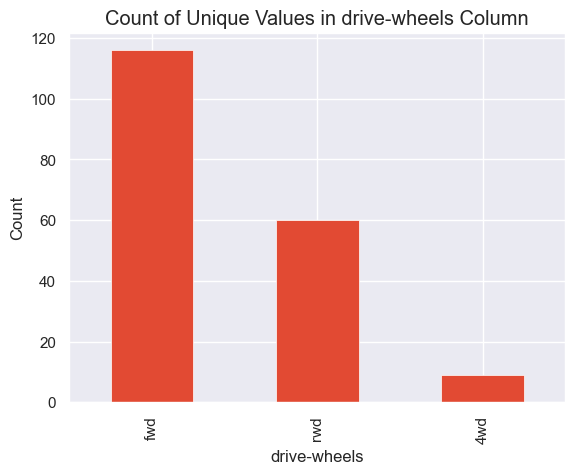

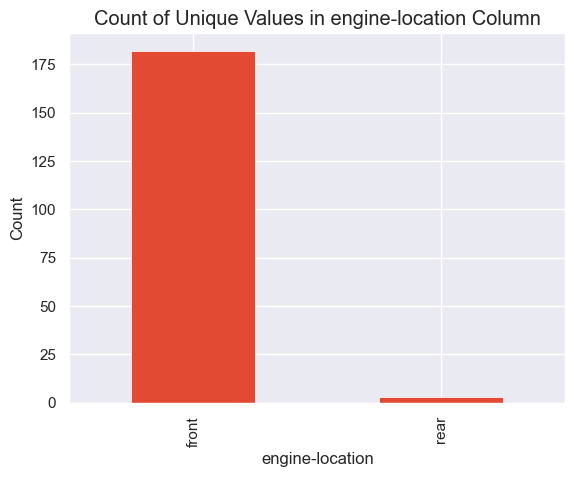

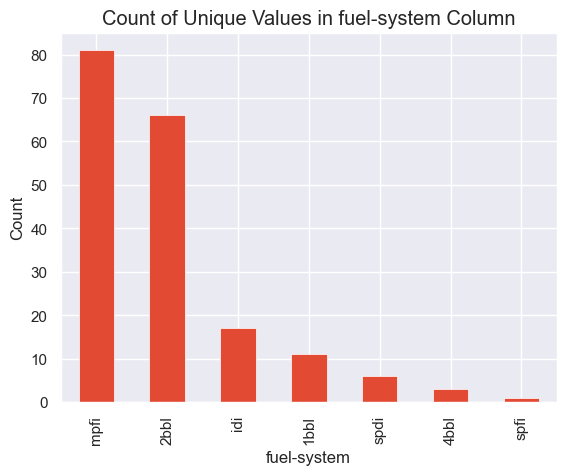

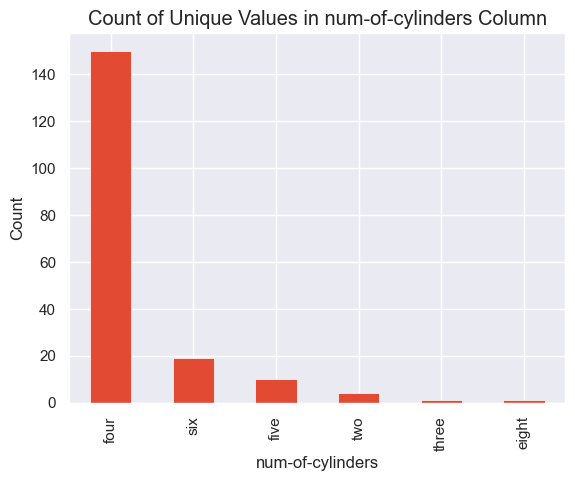

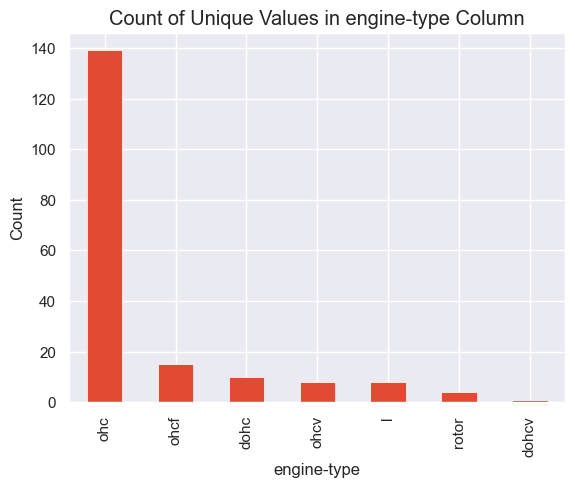

In [32]:

category_col=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels','engine-location','fuel-system','num-of-cylinders','engine-type']
for v in category_col:
    df[v].value_counts().plot(kind='bar')
    plt.xlabel(v)
    plt.ylabel('Count')
    plt.title(f'Count of Unique Values in {v} Column')
    plt.show()

Biến engine-location, fuel-type, aspiration, num_of_cylinder mất cân bằng dữ liệu

    Encoding the Categorical Data

In [ ]:
Y=df['price']
X=df.drop(['price'],axis=1)

In [ ]:
# Có 22 hãng xe trong tập dữ liệu mà với lượng dữ liệu còn hạn chế nên việc loại bỏ biến make sẽ gây gây thách thức, cản trở cho mô hình cũng như làm giả độ chính xác của mô hình
X=df.drop(['make'],axis=1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# ENCODING biến num-of-cylinders 
Encoder_label1 = OrdinalEncoder()
# get the integer labels for each category
result1 = Encoder_label1.fit_transform(np.array(X['num-of-cylinders']).reshape(-1, 1))
X['num-of-cylinders']=result1

In [ ]:
mapping = pd.DataFrame({'category': df['num-of-cylinders'].unique(),
                        'integer_label': range(len(X['num-of-cylinders'].unique()))})
print(mapping)

  category  integer_label
0     four              0
1      six              1
2     five              2
3    three              3
4      two              4
5    eight              5


In [ ]:
# ENCODING biến'fuel-system'
Encoder_label2 = OrdinalEncoder()
result2 = Encoder_label2.fit_transform(np.array(X['fuel-system']).reshape(-1, 1))
X['fuel-system']= result2

In [ ]:
# ENCODING biến 'engine-type' 
Encoder_label3 = OrdinalEncoder()
result3 = Encoder_label3.fit_transform(np.array(X['engine-type']).reshape(-1, 1))
X['engine-type']= result3

In [ ]:
# ENCODING biến 'body-style' 
Encoder_label4 = OrdinalEncoder()
result4 = Encoder_label4.fit_transform(np.array(X['body-style']).reshape(-1, 1))
X['body-style']= result4

In [ ]:
# ENCODING biến 'drive-wheels' 
Encoder_label5 = OrdinalEncoder()
result5 = Encoder_label5.fit_transform(np.array(X['drive-wheels']).reshape(-1, 1))
X['drive-wheels']= result5

In [ ]:
# encoding cột "fuel_type"
X['fuel-type'] = np.where(X['fuel-type'] == 'diesel', 1, 0)
# ecoding cột 'aspiration' 
X.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)
# encoding cột 'engine-location'
X.replace({'engine-location':{'front':0,'rear':1}},inplace=True)
# encoding  cột'num-of-doors'
X.replace({'num-of-doors':{'two':0,'four':1}},inplace=True)

In [ ]:
# Phân chia dữa liệu Training và Test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2022)
from sklearn.linear_model import LinearRegression
# loading the linear regression model
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Dự đoán dữ liệu biến giá xe dựa trên tập training
Y_predict = model.predict(X_test)

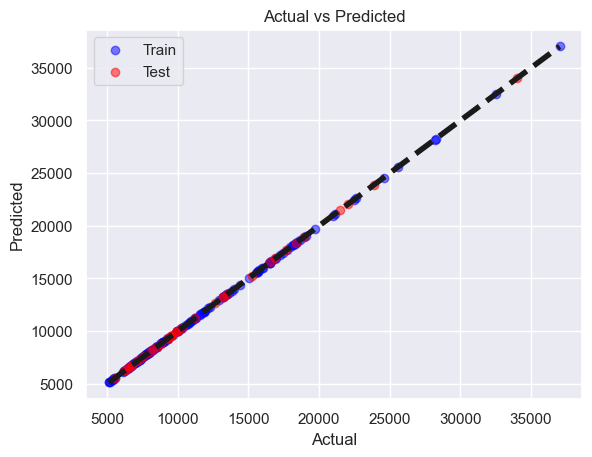

In [ ]:
# Vẽ scatter plot cho tập huấn luyện
plt.scatter(Y_train, model.predict(X_train), color='blue', alpha=0.5, label='Train')
# Vẽ scatter plot cho tập kiểm tra
plt.scatter(Y_test, model.predict(X_test), color='red', alpha=0.5, label='Test')
# Thêm tiêu đề và tên trục
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
# Thêm đường chéo cho việc so sánh
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], 'k--', lw=4)
# Thêm legend
plt.legend(loc='upper left')
# Hiển thị đồ thị
plt.show()


MODEL EVALUATION

In [ ]:
from sklearn.metrics import mean_absolute_error
print ("Mean Absolute Error (MAE): ", mean_absolute_error(Y_predict,Y_test))
from sklearn.metrics import mean_squared_error
print ("Mean Squared Error (MSE) : ", mean_squared_error(Y_predict,Y_test))
print ("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(Y_predict,Y_test)))
from sklearn.metrics import r2_score
print("Co-efficient of determination (R2 Score): ",r2_score(Y_predict,Y_test))

Mean Absolute Error (MAE):  1.7944084656601017e-12
Mean Squared Error (MSE) :  7.399913047433842e-24
Root Mean Squared Error (RMSE):  2.720278119500622e-12
Co-efficient of determination (R2 Score):  1.0


- Sai số tuyệt đối trung bình (MAE) ở mức thấp -> Mô hình có khả năng overfitting dữ liệu huấn luyện, tức là mô hình quá tập trung vào dữ liệu huấn luyện và không thể tổng quát hóa cho các dữ liệu mới.

- Nhưng do sai số toàn phương trung bình (MSE) và Độ lệch gốc-trung bình-bình phương (RMSE) đều ở mức rất thấp -> có khả năng mô hình dự đoán chính xác giá trị thực tế

- Khi R2 Score bằng 1.0, nghĩa là mô hình hồi quy tuyến tính giải thích được toàn bộ phương sai của biến phụ thuộc bằng các biến độc lập và không có sự sai khác giữa giá trị thực tế và giá trị dự đoán của mô hình.